### Retrieval Augmented Generation Practice

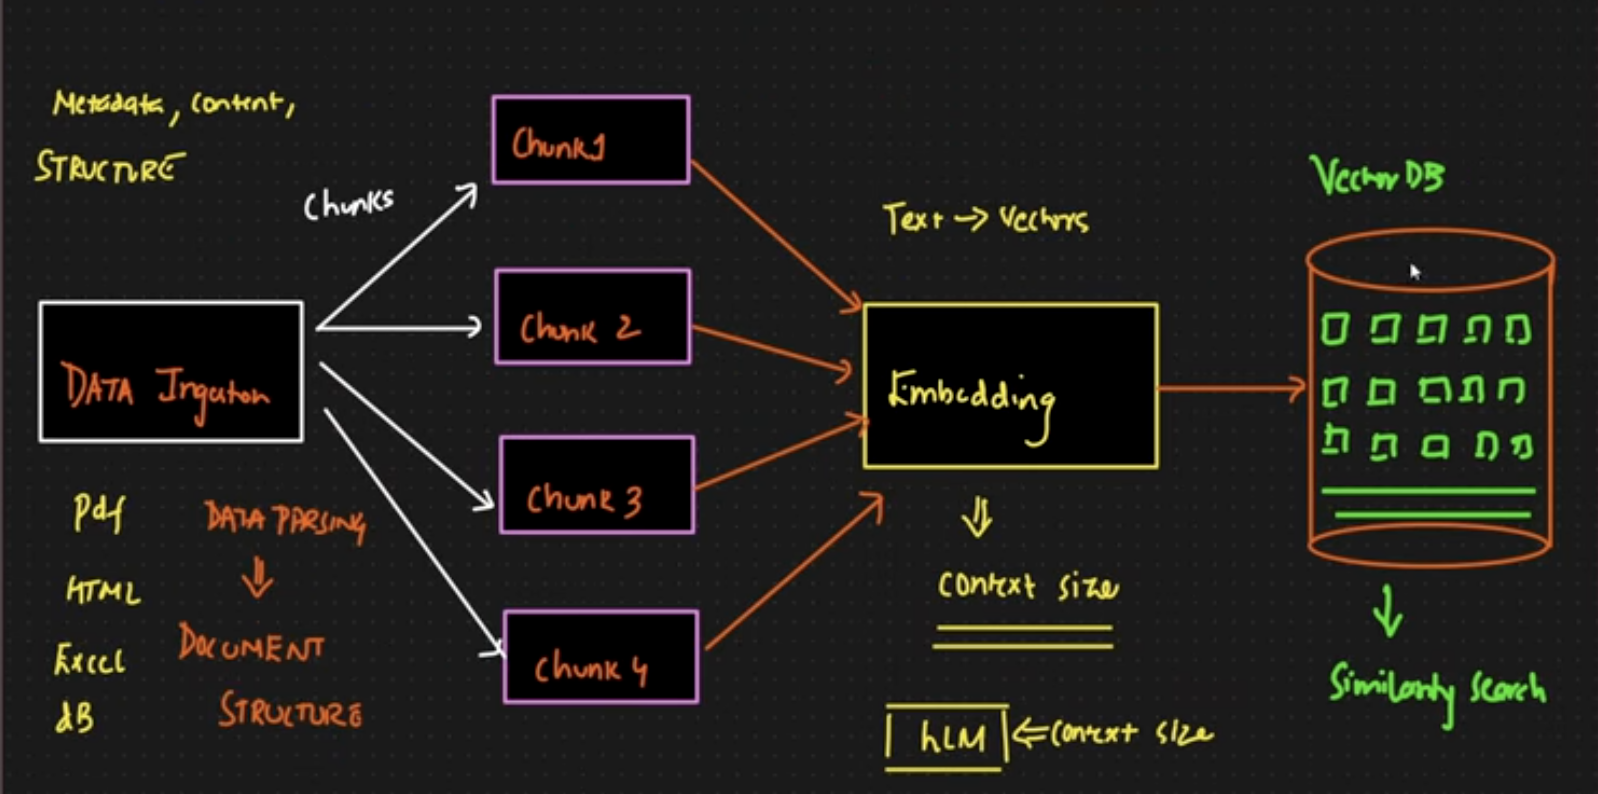

Data Ingestion: Data Parsing, Document Structure
Chunking
Embeddings
Vector DB


In [1]:
###Document Structure

from langchain_core.documents import Document

In [29]:
doc = Document(
    page_content = "Hello I am learning RAG",
    metadata={
        "source": "example.txt",
        "pages": 1,
        "author": "Funto Adeyemi",
        "date_created": "2026-02-19"
    }
)
doc.page_content

'Hello I am learning RAG'

In [ ]:
###create a simple txt folder
import os
os.makedirs("data/text_files", exist_ok=True)

In [10]:
###create text files

sample_texts = {
    "data/text_files/pullup_tips.txt": """For better pull ups, treat each rep like a clean skill, not a struggle. Start by owning the dead hang with shoulders “packed” down and back, then initiate by pulling your elbows toward your ribs instead of yanking with your arms. Keep your body tight like a plank, squeeze glutes and abs, and avoid swinging by crossing your feet slightly in front. Think “chest to bar” and lead with your sternum, not your chin. Use a full range of motion, control the lower (the eccentric) for 2–3 seconds, and stop the set when form breaks. If you’re building strength, practice scapular pull ups, slow negatives, and band-assisted reps, and prioritize consistency over maxing out.
    """,

    "data/text_files/hacksquat_tips.txt": """For a solid hack squat, set your feet first: a little higher on the platform usually feels more knee-friendly and hits more glutes, while lower hits more quads. Keep your whole foot planted and drive through midfoot, not just your toes. Use the sled to guide you, but don’t relax at the bottom: keep your core braced, ribs down, and your lower back gently pressed into the pad the whole time. Descend under control until your thighs are at least parallel (or as deep as your hips allow without your pelvis tucking), then push up while keeping your knees tracking over your toes, not caving in. Think “sit down between my heels, then stand up through the floor,” and avoid locking out hard so your quads stay loaded.
    
    """
} 

for filepath, content in sample_texts.items():
    with open(filepath, 'w', encoding="utf-8") as f:
        f.write(content)

print("Sample text files created")


Sample text files created


In [24]:
###load files with langchain
from langchain_community.document_loaders import TextLoader

loader = TextLoader("data/text_files/hacksquat_tips.txt", encoding="utf-8")
text = loader.load()
text[0].page_content



'For a solid hack squat, set your feet first: a little higher on the platform usually feels more knee-friendly and hits more glutes, while lower hits more quads. Keep your whole foot planted and drive through midfoot, not just your toes. Use the sled to guide you, but don’t relax at the bottom: keep your core braced, ribs down, and your lower back gently pressed into the pad the whole time. Descend under control until your thighs are at least parallel (or as deep as your hips allow without your pelvis tucking), then push up while keeping your knees tracking over your toes, not caving in. Think “sit down between my heels, then stand up through the floor,” and avoid locking out hard so your quads stay loaded.\n\n    '

In [32]:
###Directory Loader
from langchain_community.document_loaders import DirectoryLoader

dir_loader=DirectoryLoader(
    "data/text_files",
    glob= "**/*.txt", ##pattern to match files
    loader_cls= TextLoader,
    loader_kwargs= {'encoding': 'utf-8'},
    show_progress=True
)

documents = dir_loader.load()
documents

100%|██████████| 2/2 [00:00<00:00, 2014.07it/s]


[Document(metadata={'source': 'data/text_files/pullup_tips.txt'}, page_content='For better pull ups, treat each rep like a clean skill, not a struggle. Start by owning the dead hang with shoulders “packed” down and back, then initiate by pulling your elbows toward your ribs instead of yanking with your arms. Keep your body tight like a plank, squeeze glutes and abs, and avoid swinging by crossing your feet slightly in front. Think “chest to bar” and lead with your sternum, not your chin. Use a full range of motion, control the lower (the eccentric) for 2–3 seconds, and stop the set when form breaks. If you’re building strength, practice scapular pull ups, slow negatives, and band-assisted reps, and prioritize consistency over maxing out.\n    '),
 Document(metadata={'source': 'data/text_files/hacksquat_tips.txt'}, page_content='For a solid hack squat, set your feet first: a little higher on the platform usually feels more knee-friendly and hits more glutes, while lower hits more quads.

In [37]:
###create folder for pdf
os.makedirs("data/pdf_files", exist_ok = True)

sample_pdfs = {
    "data/pdf_files/pullup.pdf": """For better pull ups, treat each rep like a clean skill, not a struggle. Start by owning the dead hang with shoulders “packed” down and back, then initiate by pulling your elbows toward your ribs instead of yanking with your arms. Keep your body tight like a plank, squeeze glutes and abs, and avoid swinging by crossing your feet slightly in front. Think “chest to bar” and lead with your sternum, not your chin. Use a full range of motion, control the lower (the eccentric) for 2–3 seconds, and stop the set when form breaks. If you’re building strength, practice scapular pull ups, slow negatives, and band-assisted reps, and prioritize consistency over maxing out.
    """,

    "data/pdf_files/hacksquat.pdf": """For a solid hack squat, set your feet first: a little higher on the platform usually feels more knee-friendly and hits more glutes, while lower hits more quads. Keep your whole foot planted and drive through midfoot, not just your toes. Use the sled to guide you, but don’t relax at the bottom: keep your core braced, ribs down, and your lower back gently pressed into the pad the whole time. Descend under control until your thighs are at least parallel (or as deep as your hips allow without your pelvis tucking), then push up while keeping your knees tracking over your toes, not caving in. Think “sit down between my heels, then stand up through the floor,” and avoid locking out hard so your quads stay loaded.
    
    """
}

for filename, content in sample_pdfs.items():
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(content)

print('Sample pdf files created')

Sample pdf files created


In [ ]:
from fpdf import FPDF
from pathlib import Path

pdfs = {
    "data/pdf_files/pullup_tips.pdf": "For better pull ups, treat each rep like a clean skill, not a struggle. Start by owning the dead hang with shoulders “packed” down and back, then initiate by pulling your elbows toward your ribs instead of yanking with your arms. Keep your body tight like a plank, squeeze glutes and abs, and avoid swinging by crossing your feet slightly in front. Think “chest to bar” and lead with your sternum, not your chin. Use a full range of motion, control the lower (the eccentric) for 2–3 seconds, and stop the set when form breaks. If you’re building strength, practice scapular pull ups, slow negatives, and band-assisted reps, and prioritize consistency over maxing out.",

    "data/pdf_files/hacksquat_tips.pdf": "For a solid hack squat, set your feet first: a little higher on the platform usually feels more knee-friendly and hits more glutes, while lower hits more quads. Keep your whole foot planted and drive through midfoot, not just your toes. Use the sled to guide you, but don’t relax at the bottom: keep your core braced, ribs down, and your lower back gently pressed into the pad the whole time. Descend under control until your thighs are at least parallel (or as deep as your hips allow without your pelvis tucking), then push up while keeping your knees tracking over your toes, not caving in. Think “sit down between my heels, then stand up through the floor,” and avoid locking out hard so your quads stay loaded"
}

Path("data/pdf_files").mkdir(parents=True, exist_ok=True)

for path, content in pdfs.items():
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 8, content.strip())
    pdf.output(path)
